# Impact of Covid-19 on Mental Health and Wellbeing in Canada

### Import Packages

In [1]:
import kaggle
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import numpy as np

### Download Dataset 

In [2]:
folder_name = "Covid_19_Dataset"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

directory_path = os.path.join(os.getcwd(), folder_name)
kaggle.api.dataset_download_files('imdevskp/corona-virus-report', path=directory_path, unzip=True)

In [3]:
df = pd.read_csv('Covid_19_Dataset/full_grouped.csv')
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [4]:
canada_df = df[df['Country/Region'] == 'Canada']
canada_df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
32,2020-01-22,Canada,0,0,0,0,0,0,0,Americas
219,2020-01-23,Canada,0,0,0,0,0,0,0,Americas
406,2020-01-24,Canada,0,0,0,0,0,0,0,Americas
593,2020-01-25,Canada,0,0,0,0,0,0,0,Americas
780,2020-01-26,Canada,1,0,0,1,1,0,0,Americas


Text(0, 0.5, 'Total cases(#)')

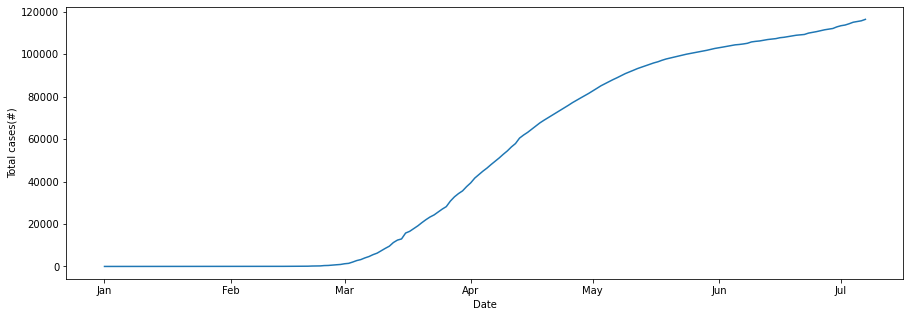

In [5]:
fig , ax = plt.subplots(figsize = (15,5))
canada_df.set_index('Date')['Confirmed'].plot(kind='line')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
plt.ylabel('Total cases(#)')

In [6]:
canada_covid_cases = canada_df.groupby(
    ["Date"])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
canada_covid_cases.head()

<ipython-input-6-f40a55df6b0d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  canada_covid_cases = canada_df.groupby(


,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,1,0,0


In [7]:
num_indexes = canada_covid_cases.shape[0]
print("Number of indexes:", num_indexes)

Number of indexes: 188


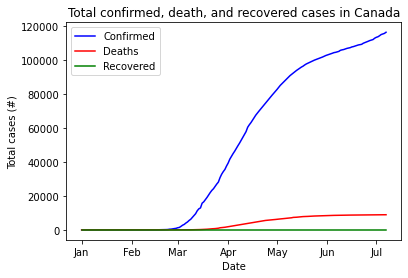

In [8]:
ax = plt.gca()
canada_covid_cases.plot(kind='line', x='Date', y='Confirmed', color='blue', ax=ax)
canada_covid_cases.plot(kind='line', x='Date', y='Deaths', color='red', ax=ax)
canada_covid_cases.plot(kind='line', x='Date', y='Recovered', color='green', ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  

plt.ylabel('Total cases (#)')
plt.title('Total confirmed, death, and recovered cases in Canada')

plt.show()

In [9]:
covid_index_df = pd.DataFrame(canada_covid_cases.index)
covid_confirmed_df = pd.DataFrame(canada_covid_cases.Confirmed)

In [10]:
x_days_train = covid_index_df[0:185] # train the model using 90 precent of data
x_days_validate = covid_index_df[185:188] # Validate the model using 10 precent of data

In [11]:
y_confirmed_train = covid_confirmed_df[0:185]# train the model using 90 precent of data
y_confirmed_validate = covid_confirmed_df[185:188]# Validate the model using 10 precent of data

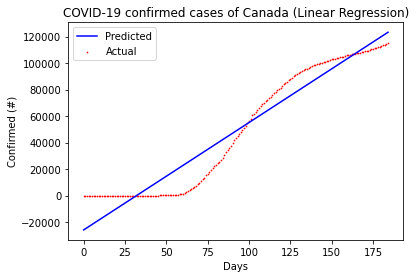

In [12]:
ln_model = LinearRegression()
ln_model.fit(x_days_train, y_confirmed_train)
plt.scatter(x_days_train, y_confirmed_train, color='red', label='Actual', s=0.5)
plt.plot(x_days_train.values, ln_model.predict(x_days_train.values), color='blue', label='Predicted')
plt.title('COVID-19 confirmed cases of Canada (Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Confirmed (#)')
plt.legend() 
plt.show()


In [14]:
score_linear = r2_score(y_confirmed_train, ln_model.predict(x_days_train)) 
print('R2 Score: ', score_linear)

mse_linear = mean_squared_error(y_confirmed_train, ln_model.predict(x_days_train))
print('MSE: ', mse_linear)

rmse_linear = np.sqrt(mse_linear)
print('RMSE: ', rmse_linear)

R2 Score:  0.9254345230308971
MSE:  151167811.8883213
RMSE:  12295.032000296758


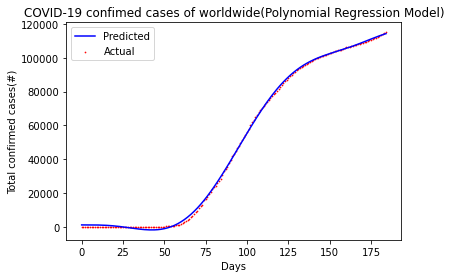

In [15]:
poly_reg = PolynomialFeatures(degree=9)
x_poly = poly_reg.fit_transform(x_days_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)


plt.scatter(x_days_train, y_confirmed_train, color='red',label='Actual', s=0.5)
plt.plot(x_days_train.values, lin_reg.predict(
    poly_reg.fit_transform(x_days_train.values)), label='Predicted', color='blue')
plt.title("COVID-19 confimed cases of Canada (Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases(#)')
plt.legend()
plt.show()

In [16]:
y_predicted = lin_reg.predict(poly_reg.fit_transform(x_days_train))

score_poly = r2_score(y_confirmed_train, y_predicted) 
print('R2 Score: ', score_poly)

mse_poly = mean_squared_error(y_confirmed_train, y_predicted)
print('MSE: ', mse_poly)

rmse_poly = np.sqrt(mse_poly)
print('RMSE: ', rmse_poly)

R2 Score:  0.99960587078847
MSE:  799024.6013306862
RMSE:  893.8817602628919


In [17]:
y_predicted_validate = lin_reg.predict(poly_reg.fit_transform(x_days_validate))
y_pred_rounded = np.round(y_predicted_validate).astype(int)
result = pd.DataFrame(y_pred_rounded, columns=['Predicted Value'])
result['Real Value'] = y_confirmed_validate.values
result = result[['Real Value', 'Predicted Value']]

print(result)

   Real Value  Predicted Value
0      115457           114554
1      115776           114807
2      116458           115034


In [18]:
y_predicted_validate = lin_reg.predict(poly_reg.fit_transform(x_days_validate))

score_poly = r2_score(y_confirmed_validate, y_predicted_validate) 
print('R2 Score: ', score_poly)

mse_poly = mean_squared_error(y_confirmed_validate, y_predicted_validate)
print('MSE: ', mse_poly)

rmse_poly = np.sqrt(mse_poly)
print('RMSE: ', rmse_poly)

R2 Score:  -6.2288823900968096
MSE:  1260143.5974966025
RMSE:  1122.5611776186643


In [19]:
df = pd.read_csv('Mental_Health_Data/Mental_Health.csv')
df.head()

,REF_DATE,GEO,DGUID,Violations and calls for service,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2019-03,"Total, Selected police services",NaN,"Total assaults (levels 1, 2, 3) [141]",Actual incidents,Number,223,units,0,v1267112443,20.1.1,NaN,..,NaN,t,0
1,2019-03,"Total, Selected police services",NaN,"Assaults by non-family (levels 1, 2, 3)",Actual incidents,Number,223,units,0,v1267112444,20.2.1,NaN,..,NaN,t,0
2,2019-03,"Total, Selected police services",NaN,"Assaults by family (levels 1, 2, 3)",Actual incidents,Number,223,units,0,v1267112445,20.3.1,NaN,..,NaN,t,0
3,2019-03,"Total, Selected police services",NaN,Assaults where relationship type is unknown,Actual incidents,Number,223,units,0,v1267112446,20.4.1,NaN,..,NaN,t,0
4,2019-03,"Total, Selected police services",NaN,"Total sexual assaults (levels 1, 2, 3) [131]",Actual incidents,Number,223,units,0,v1267112447,20.5.1,NaN,..,NaN,t,0


In [20]:
filtered_df = df[(df['REF_DATE'] >= '2020-01') & (df['REF_DATE'] < '2020-07')]
selected_columns = ['REF_DATE', 'GEO','Violations and calls for service', 'VALUE']
filtered_df = filtered_df[selected_columns]
selected_violations = [
    'Calls for service, domestic disturbances / disputes',
    'Calls for service, Mental Health Act (MHA) apprehension',
    'Calls for service, mental health - other',
    'Calls for service, suicide/attempted suicide',
    'Calls for service, overdose',
    'Calls for service, child welfare check',
    'Calls for service, check welfare - general',
    'Calls for service, child custody matter - domestic'
]
filtered_df = filtered_df[filtered_df['Violations and calls for service'].isin(selected_violations)]
filtered_df['VALUE'] = filtered_df['VALUE'].fillna(0)
filtered_df['VALUE'] = filtered_df['VALUE'].astype(int)
filtered_df.head()

,REF_DATE,GEO,Violations and calls for service,VALUE
6826,2020-01,"Total, Selected police services","Calls for service, domestic disturbances / dis...",0
6827,2020-01,"Total, Selected police services","Calls for service, Mental Health Act (MHA) app...",0
6828,2020-01,"Total, Selected police services","Calls for service, mental health - other",0
6829,2020-01,"Total, Selected police services","Calls for service, suicide/attempted suicide",0
6830,2020-01,"Total, Selected police services","Calls for service, overdose",0


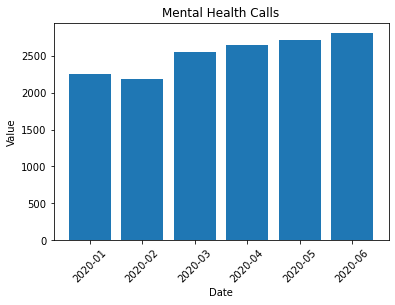

In [21]:
filtered_df.sort_values(by='REF_DATE', inplace=True)
plt.bar(filtered_df['REF_DATE'], filtered_df['VALUE'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mental Health Calls')
plt.xticks(rotation=45)
plt.show()